# Plot degree distribution

In this notebook, we are fetching node's degree from Neo4j and storing data in a `pandas.DataFrame`. From there, we are drawing the degree-rank and degree-distribution plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from neo4j import GraphDatabase

## load custom matplotlib style for nicer (IMHO) figure rendering
plt.style.use('../my_style.mplstyle')

In [2]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "<PASSWORD>"))

In [3]:
def get_degrees(tx, node_label: str) -> dict[int, int]:
    query = f"""
    MATCH (n:{node_label})-[r]-() 
    RETURN n.id as nodeId, count(r) as degree
    """
    result = tx.run(query)
    res = result.data()
    return res

In [4]:
with driver.session() as s:
    #### =======> HERE <=========
    # you can change "NodeA" to "NodeB" to draw the distribution for the graph B
    degree_data = s.read_transaction(get_degrees, "NodeA")
data = pd.DataFrame(degree_data)
data

,nodeId,degree
0,0,75
1,1,69
2,2,41
3,3,66
4,4,51
...,...,...
1995,1768,10
1996,1904,10
1997,1828,10
1998,1961,10


In [5]:
def plot_degree_distribution(degrees: pd.Series):
    # define figure and subplots
    fig = plt.figure(figsize=(12, 8))
    ax1, ax2 = fig.subplots(1, 2)

    # draw rank plot
    # sort degrees by values, and reset series index to plot
    # the node degrees occurrences
    sorted_degree = degrees.sort_values(ascending=False).reset_index().degree
    sorted_degree.plot(
        ax=ax1, 
        marker="o", color="k", 
        title="Degree Rank Plot", xlabel="Rank", ylabel="Degree",
        logy=True,
    )

    # compute and draw degree distribution
    distribution = degrees.value_counts().sort_index()
    distribution.plot(
        ax=ax2, 
        marker="o", color="k",
        title="Degree Distribution", xlabel="Degree", ylabel="nbOccurrences",
        logy=True, 
        # logx=True,
    )

    fig.tight_layout()
    return fig

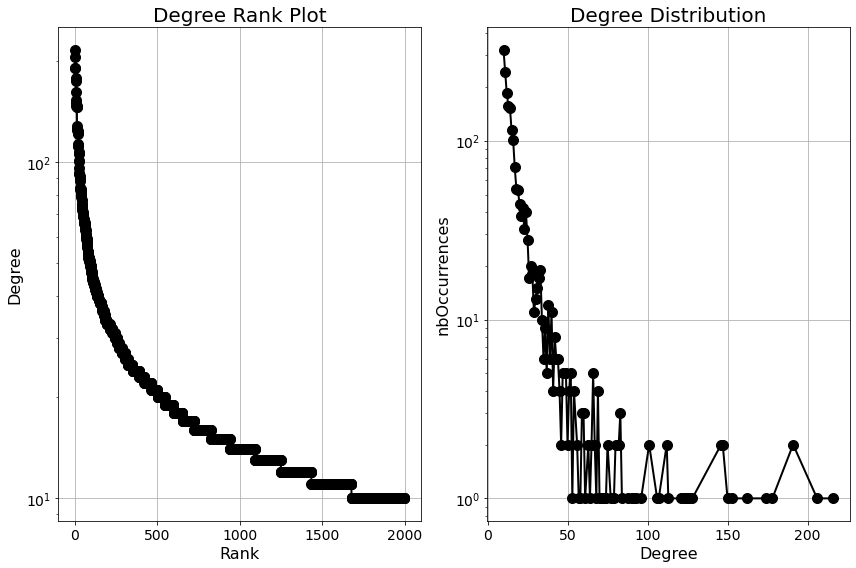

In [6]:
plot_degree_distribution(data.degree);